In [1]:
import sys, os
sys.path.insert(0, os.path.abspath('/home/tguethle/Documents/spi/Master_Thesis/main_files'))


import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import crab_fits

from chainconsumer import ChainConsumer
matplotlib.rcParams.update(matplotlib.rcParamsDefault)


10:33:55 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=182255;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=253966;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#48\48]8;;\
                  available                                                                                        

10:33:56 WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=154840;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=35192;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#69\69]8;;\
                  will not be available.                                                                           

         WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=421052;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=46528;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#33\33]8;;\
                  available                                                                                        

10:33:56 INFO      Starting 3ML!                                                                     ]8;id=4447;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=524471;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/__init__.py#31\31]8;;\

         WARNING   ROOT minimizer not available                                                ]8;id=625779;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=345667;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/minimizer/minimization.py#1345\1345]8;;\

10:33:57 WARNING   PyGMO is not available                                                      ]8;id=920179;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=46586;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/minimizer/minimization.py#1369\1369]8;;\

10:33:57 WARNING   The cthreeML package is not installed. You will not be able to use plugins which  ]8;id=417186;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=312125;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/__init__.py#79\79]8;;\
                  require the C/C++ interface (currently HAWC)                                                     

         WARNING   Could not import plugin HAWCLike.py. Do you have the relative instrument         ]8;id=745124;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=580820;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/__init__.py#129\129]8;;\
                  software installed and configured?                                                               

         WARNING   Could not import plugin FermiLATLike.py. Do you have the relative instrument     ]8;id=793439;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=545980;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/__init__.py#129\129]8;;\
                  software installed and configured?                                                               

         WARNING   No fermitools installed                                              ]8;id=240142;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=636090;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py#44\44]8;;\

Using the irfs that are valid between Start and 03/07/06 06:00:00 (YY/MM/DD HH:MM:SS)
Using the irfs that are valid between 03/07/06 06:00:00 and 04/07/17 08:20:06 (YY/MM/DD HH:MM:SS)
Using the irfs that are valid between 04/07/17 08:20:06 and 09/02/19 09:59:57 (YY/MM/DD HH:MM:SS)
Using the irfs that are valid between 09/02/19 09:59:57 and 10/05/27 12:45:00 (YY/MM/DD HH:MM:SS)
Using the irfs that are valid between 10/05/27 12:45:00 and present (YY/MM/DD HH:MM:SS)


In [13]:
base_path = "/home/tguethle/Documents/spi/Master_Thesis/"
config_2003 = crab_fits.config_low_e_break_2003[:3] + crab_fits.config_low_e_break_2003_additional[0:1] + crab_fits.config_low_e_break_2003[3:4] + crab_fits.config_low_e_break_2003_additional[1:]
config_2017 = crab_fits.config_low_e_break_2017[:3] + crab_fits.config_low_e_break_2017_additional[0:1] + crab_fits.config_low_e_break_2017[3:4] + crab_fits.config_low_e_break_2017_additional[1:]

# Testing
# for config in config_2003:
#     print(config["fit_path"])

fits_2003 = [base_path+config["fit_path"] for config in config_2003]
fits_2017 = [base_path+config["fit_path"] for config in config_2017]

In [14]:
vals_2003 = np.array([np.loadtxt(fit+"/fit_val.txt") for fit in fits_2003])
vals_2017 = np.array([np.loadtxt(fit+"/fit_val.txt") for fit in fits_2017])

err_2003 = np.array([np.sqrt(np.diag(np.loadtxt(fit+"/fit_cov.txt"))) for fit in fits_2003])
err_2017 = np.array([np.sqrt(np.diag(np.loadtxt(fit+"/fit_cov.txt"))) for fit in fits_2017])
err_2003.shape

(7, 6)

In [15]:
vals_2003

array([[ 7.80391852e-04,  4.64220265e+01, -1.96675306e+00,
        -2.13634482e+00,  2.55571409e-08, -4.06573274e-01],
       [ 1.44692631e-03,  3.49071555e+01, -1.40009864e+00,
        -2.10960883e+00,  1.84212751e-08, -2.39182686e+00],
       [ 1.34450000e-03,  3.89543433e+01, -1.40549227e+00,
        -2.11903848e+00,  1.93095231e-08, -3.41872146e+00],
       [ 1.19368121e-03,  4.66980262e+01, -1.40016609e+00,
        -2.13646978e+00,  1.98891168e-08, -5.56436978e-01],
       [ 1.06723970e-03,  5.45243979e+01, -1.40086602e+00,
        -2.14192216e+00,  2.58071049e-08, -9.39511039e-01],
       [ 1.02424834e-03,  5.65409273e+01, -1.41132665e+00,
        -2.13823183e+00,  2.62540270e-08, -1.13036739e+00],
       [ 9.13530090e-04,  6.50572505e+01, -1.40118653e+00,
        -2.14281273e+00,  3.35121057e-08, -6.33689381e-01]])

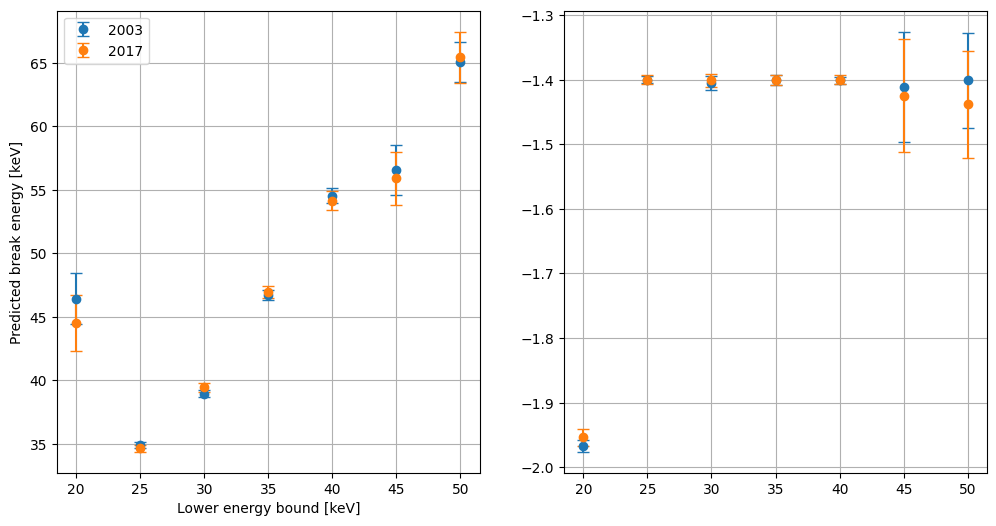

In [20]:
%matplotlib inline
fig, (ax,ax2) = plt.subplots(1,2, figsize=(12,6), sharex=True)

# ax.scatter((20,25,30,40), vals_2003[:,1], label="2003")
# ax.scatter((20,25,30,40), vals_2017[:,1], label="2017")

ax.set_xlabel("Lower energy bound [keV]")
ax.set_ylabel("Predicted break energy [keV]")

ax.grid()
ax2.grid()

ax2.errorbar((20,25,30,35,40, 45,50), vals_2003[:,2], yerr=err_2003[:,2], fmt='o', capsize=4, label="2003")
ax2.errorbar((20,25,30,35,40, 45,50), vals_2017[:,2], yerr=err_2017[:,2], fmt='o', capsize=4, label="2003")

ax.errorbar((20,25,30,35,40, 45,50), vals_2003[:,1], yerr=err_2003[:,1], fmt='o', capsize=4, label="2003")
ax.errorbar((20,25,30,35,40, 45,50), vals_2017[:,1], yerr=err_2017[:,1], fmt='o', capsize=4, label="2017")

ax.legend(loc="upper left")


In [21]:
params = crab_fits.config_low_e_break_2003[0]["p"]
params.extend(["$z$"])

In [29]:
cc_2003 = ChainConsumer()
cc_2017 = ChainConsumer()

for n,fit in enumerate(fits_2003[1:-2]):
    # params = crab_fits.config_low_e_break_2003[n]["p"]
    # params.extend(["$z$"])
    cc_2003.add_chain(np.loadtxt(fit+"/chain.dat"), parameters=params, name=fit.split("/")[-1])


for n,fit in enumerate(fits_2017[0:]):
    # params = crab_fits.config_low_e_break_2003[n]["p"]
    # params.extend(["$z$"])
    cc_2017.add_chain(np.loadtxt(fit+"/chain.dat"), parameters=params, name=fit.split("/")[-1])

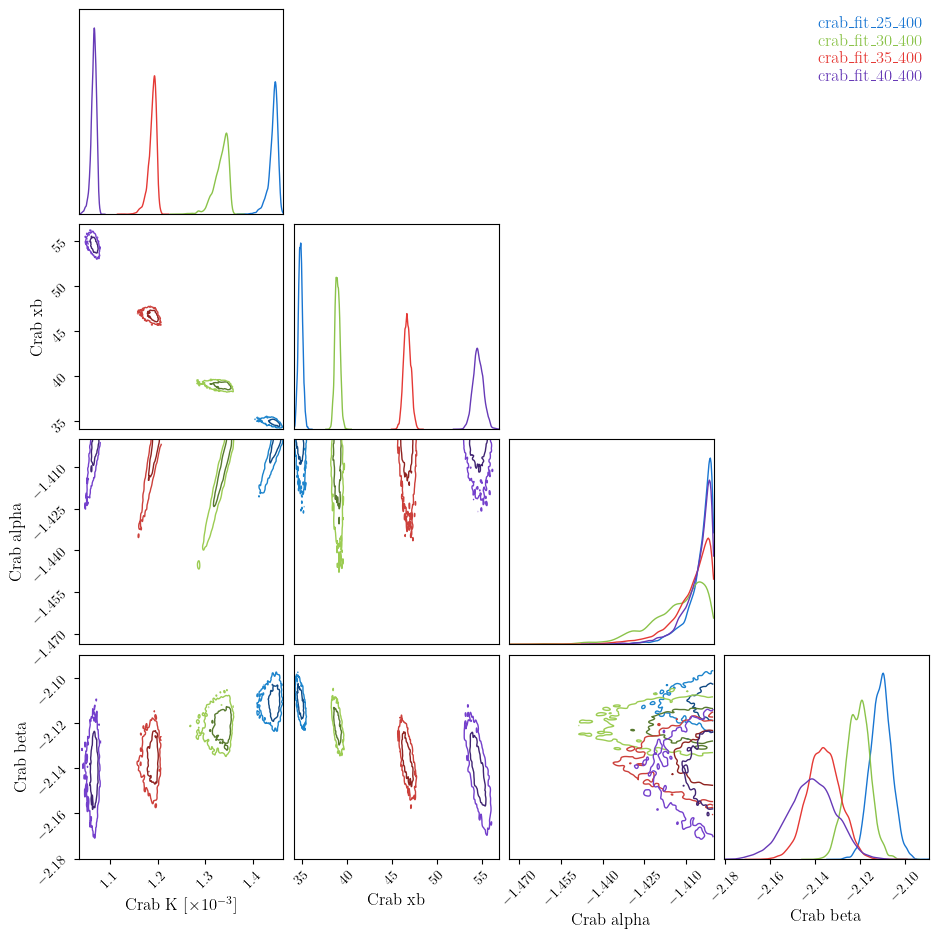

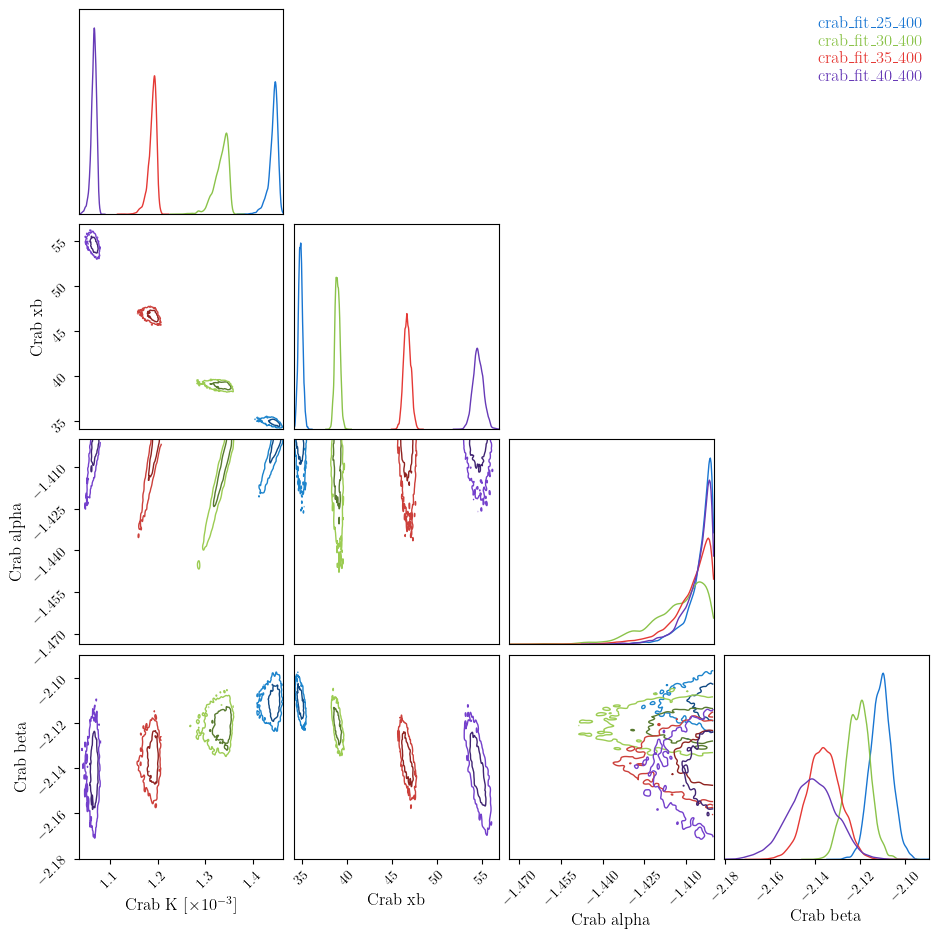

In [30]:
cc_2003.plotter.plot(figsize="PAGE", parameters=["Crab K","Crab xb", "Crab alpha", "Crab beta"])

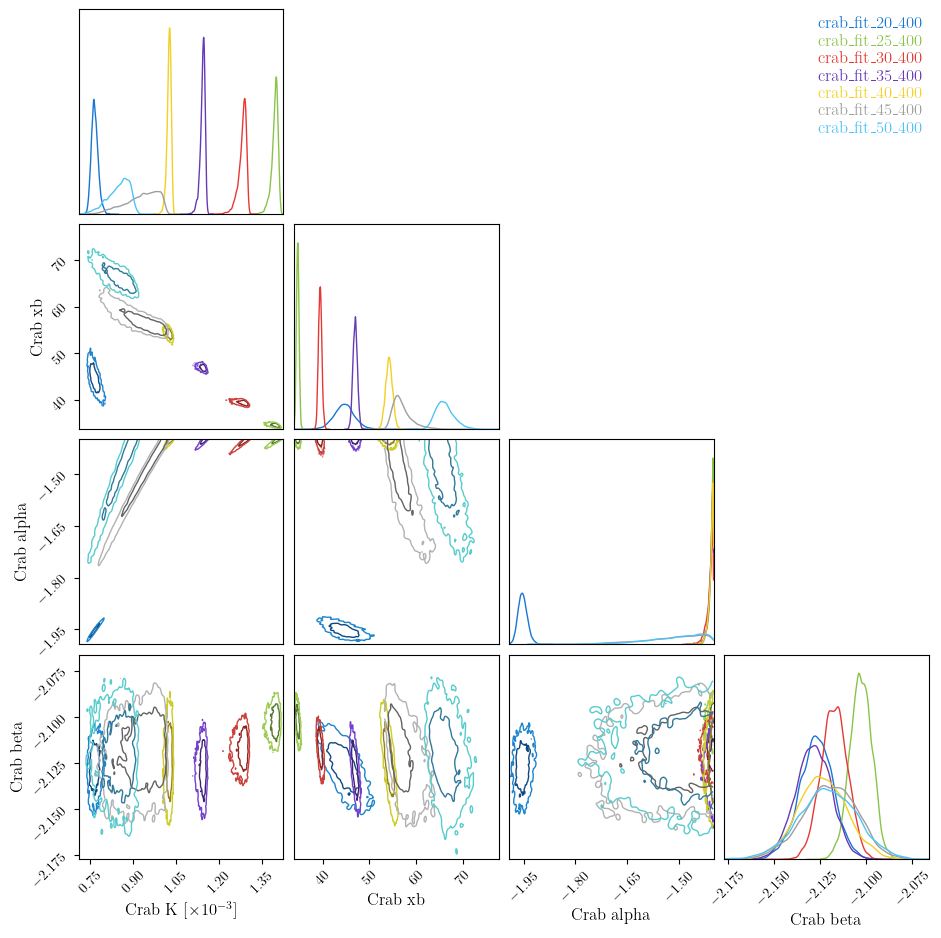

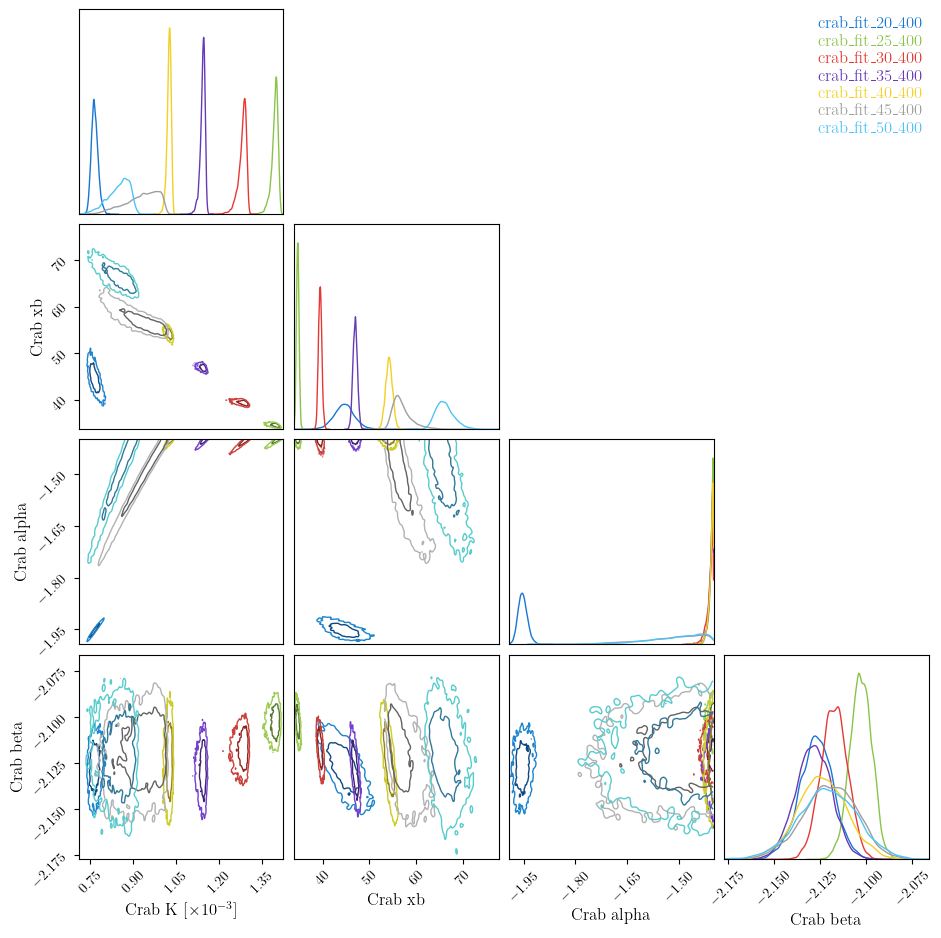

In [31]:
cc_2017.plotter.plot(figsize="PAGE", parameters=["Crab K","Crab xb", "Crab alpha", "Crab beta"], legend=True)

$$f(x)= K~\begin{cases}\left( \frac{x}{x_{b}} \right)^{\alpha} & x < x_{b} \\ \left( \frac{x}{x_{b}} \right)^{\beta} & x \ge x_{b} \end{cases}$$